In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [2]:
file_pi = open('./actuator_update/estimation_data.pickle', 
                       'rb')
data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./actuator_update/sample_error.pickle', 
                       'rb')
err_data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./actuator_param_known/sample_error.pickle', 
                       'rb')
bl_err_data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./actuator_param_wrong/sample_error.pickle', 
                       'rb')
inc_err_data = pickle.load(file_pi)
file_pi.close()

file_pi = open('./actuator_noupdate/sample_error.pickle', 
                       'rb')
nu_err_data = pickle.load(file_pi)
file_pi.close()


In [3]:
gain = []
gain_variance = []
for i in range(len(data)):
    gain.append(
            data[i]['mean gain']
    )
#     gain_variance.append(
#         np.sqrt(np.diag(data[i]['var gain']).sum())
#     )

## make this into a numpy array
gain = np.array(gain)
# gain_variance = np.array(gain_variance).flatten()
gain_err = np.square(gain-1.0) ### all gains are one

mean_err = np.mean(err_data, axis=0)
std_err = np.std(err_data, axis=0)

bl_mean_err = np.mean(bl_err_data, axis=0)
bl_std_err = np.std(bl_err_data, axis=0)

inc_mean_err = np.mean(inc_err_data, axis=0)
inc_std_err = np.std(inc_err_data, axis=0)


nu_mean_err = np.mean(nu_err_data, axis=0)
nu_std_err = np.std(nu_err_data, axis=0)



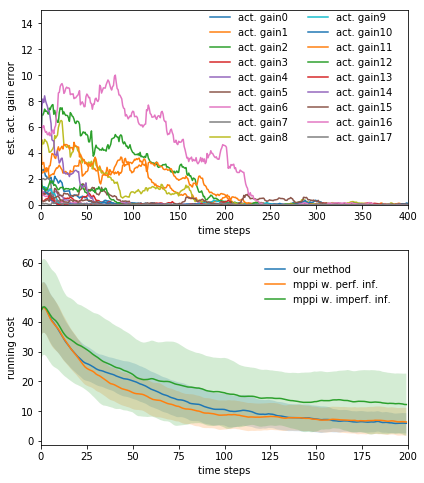

In [4]:
t = [i for i in range(len(gain))]

plt.figure(figsize=(6,7))

ax = plt.subplot(2,1,1)

num_gains = gain_err.shape[1]
for i in range(num_gains):
    ax.plot(t,gain_err[:, i], label='act. gain{}'.format(i))

ax.set_ylabel('est. act. gain error')
ax.set_xlabel('time steps')
ax.set_xlim(0,400)
ax.legend(framealpha=0.,  ncol=2, loc=(0.45,0.3))
t = [i for i in range(len(mean_err))]

ax.set_ylim(0,15)

ax = plt.subplot(2,1,2)
# ax.plot(t, nu_mean_err, label='our method no update')
# ax.fill_between(t, s
#                nu_mean_err - 0.5 * nu_std_err,
#                nu_mean_err + 0.5 * nu_std_err, alpha=0.2)
ax.plot(t, mean_err, label='our method')
ax.fill_between(t, 
               mean_err - 0.5 * std_err,
               mean_err + 0.5 * std_err, alpha=0.2)
ax.plot(t, bl_mean_err, label='mppi w. perf. inf.')
ax.fill_between(t, 
               bl_mean_err - 0.5 * bl_std_err,
               bl_mean_err + 0.5 * bl_std_err, alpha=0.2)
ax.plot(t, inc_mean_err, label='mppi w. imperf. inf.')
ax.fill_between(t, 
               inc_mean_err - 0.95 * inc_std_err,
               inc_mean_err + 0.95 * inc_std_err, alpha=0.2)

ax.legend(framealpha=0., loc=(0.6,0.7))
ax.set_ylabel('running cost')
ax.set_xlabel('time steps')
ax.set_xlim(0,200)

plt.tight_layout()

# #plt.ylim(0, 0.002)
plt.savefig('gain-manip-comparison.pdf', bbox_inches='tight')


Percent Success Figures
=======================

In [5]:
import os

In [6]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
import glob

In [10]:
og_path = './percent_success/'
file_paths = [path for path in os.listdir(og_path) if path[0] != '.' and path != 'emppi']

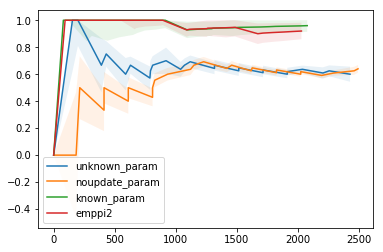

In [15]:
for path in file_paths:
    successes      = []
    time2Successes = []
    if path == 'emppi2':
        param_err      = []
    for i in range(1,6):
        _data = pickle.load(open(og_path + path + '/performance_data{}.pkl'.format(i), 'rb'))
        cma = 0.
        cma_hist = [cma]
        for i, d in enumerate(_data['successes']):
            cma = cma + (d - cma) / (i + 1)
            cma_hist.append(cma)
        attempts = np.arange(0, len(_data['successes'])) + 1
        _data['time2success'].insert(0, 0)
        time2Successes.append(np.cumsum(_data['time2success']))
        successes.append(cma_hist)
        if path == 'emppi2':
            _errors = []
            for stats in _data['stats']:
                
                _errors.append(
                    np.concatenate([np.abs(stats['mean gain']-1), [np.abs(stats['mean mass']-0.07087500000000002)]])
                )

            param_err.append(np.stack(_errors)[:1000, :])
            
    succ_var = np.var(successes, axis=0)

    time2Successes = np.mean(time2Successes, axis=0)
    successes      = np.median(successes, axis=0)
    x_ax = np.arange(0, len(successes))
#     time2Successes /= np.max(time2Successes)
    plt.plot(time2Successes, successes, label=path)
    plt.fill_between(time2Successes, successes-0.95*np.sqrt(succ_var), np.clip(successes+0.95*np.sqrt(succ_var), 0, 1), alpha=0.1)
    
plt.legend()

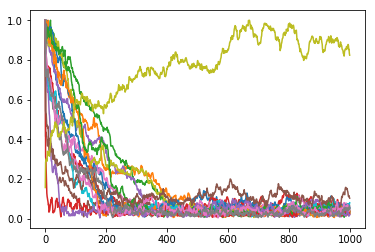

In [16]:
mean_err = np.mean(param_err, axis=0)
mean_err /= np.max(mean_err, axis=0)
plt.plot(mean_err)

In [34]:
mean_err

1.0